In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/00NLP/heart.csv", encoding="latin-1")


Mounted at /content/gdrive


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df.rename(columns = {'age':'Age',
                     'sex':'Sex',
                     'cp':'ChestPainType',
                     'trtbps':'RestingBP',
                     'chol':'Cholesterol',
                     'fbs':'FastingBS',
                     'restecg':'RestingECG',
                     'thalachh':'MaxHR',
                     'exng':'ExerciseAngina',
                     'oldpeak':'Oldpeak',
                     'slp':'ST_Slope',
                     'caa':'MajorVessels',
                     'thall':'ThalRate',
                     'output':'HeartDisease',
                     } , inplace= True)

df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
MajorVessels        int64
ThalRate            int64
HeartDisease        int64
dtype: object

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,MajorVessels,ThalRate,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
ChestPainType,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
RestingBP,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
FastingBS,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestingECG,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
MaxHR,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
ExerciseAngina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


##EDA

In [ ]:
px.imshow(df.corr().T,title="Correlation Plot of the Heat Failure Prediction")

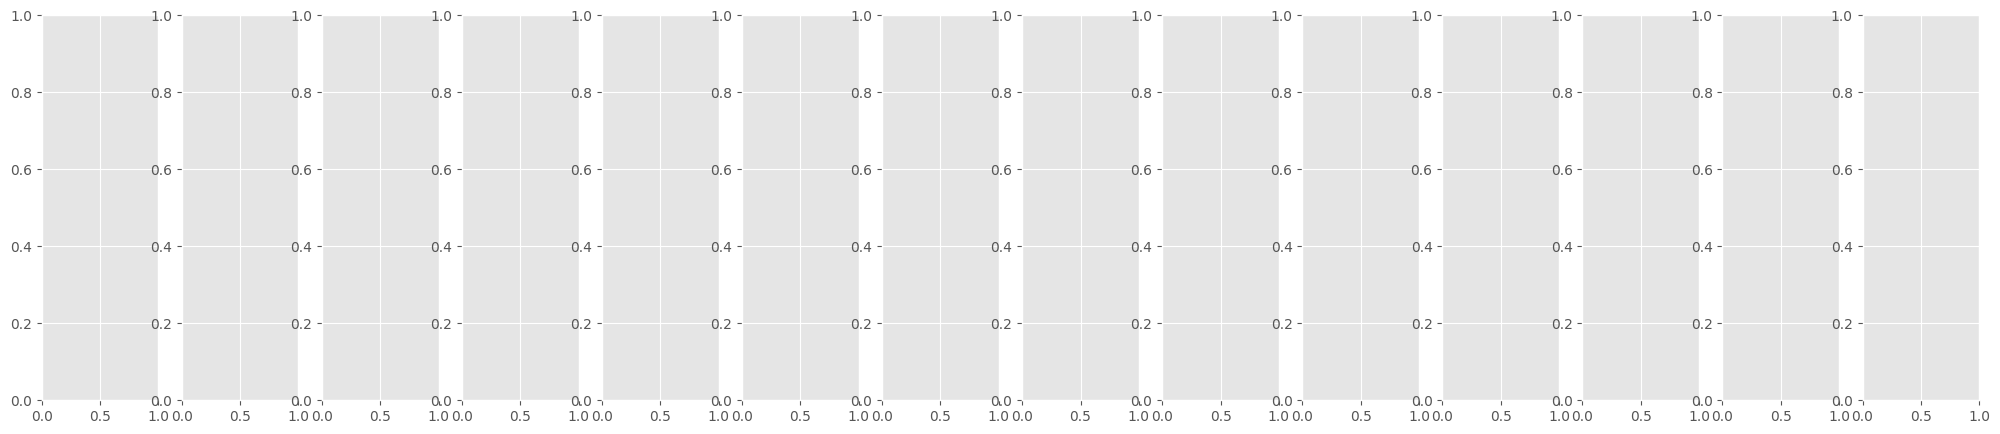

In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(25, 5))
# for i, col in enumerate(df.columns):
#     axs[i].histogram(df,
#                  x="HeartDisease",
#                  color="Sex",
#                  hover_data=df.columns,
#                  title="Distribution of Heart Diseases",
#                  barmode="group")
#     axs[i].set_title(col)
# plt.show()


fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

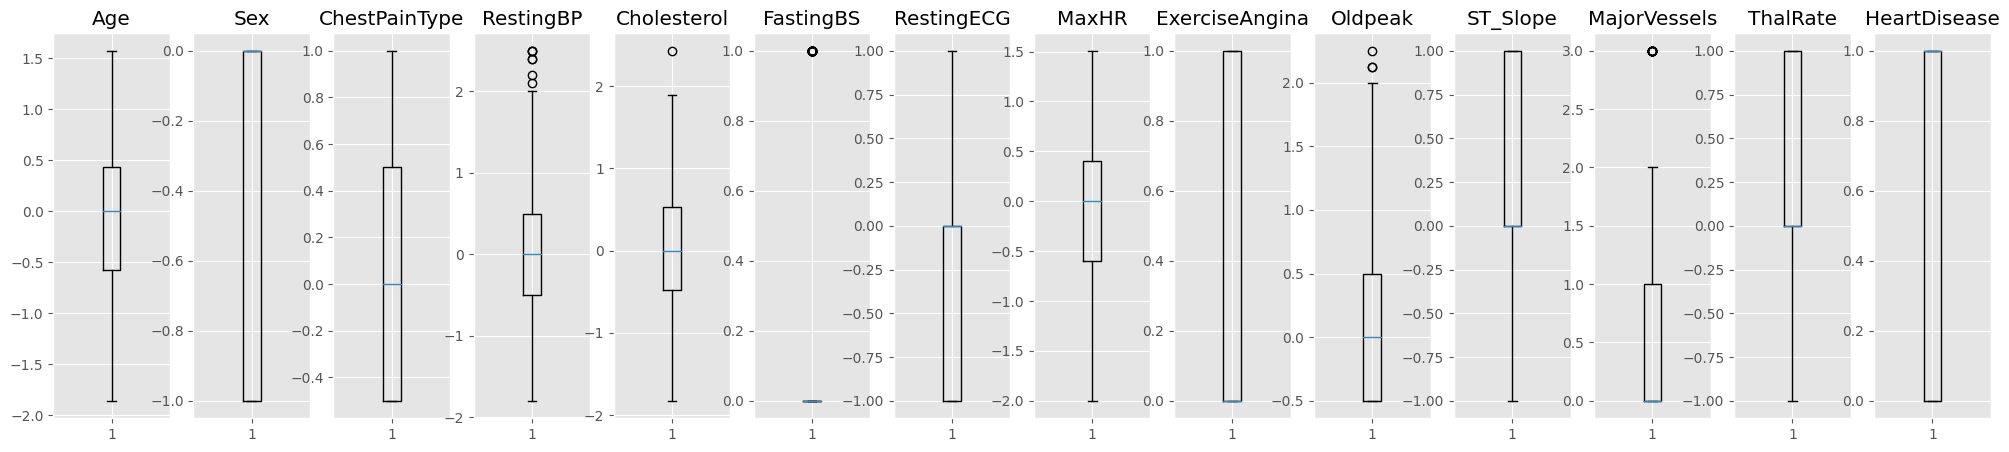

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(25, 5))
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

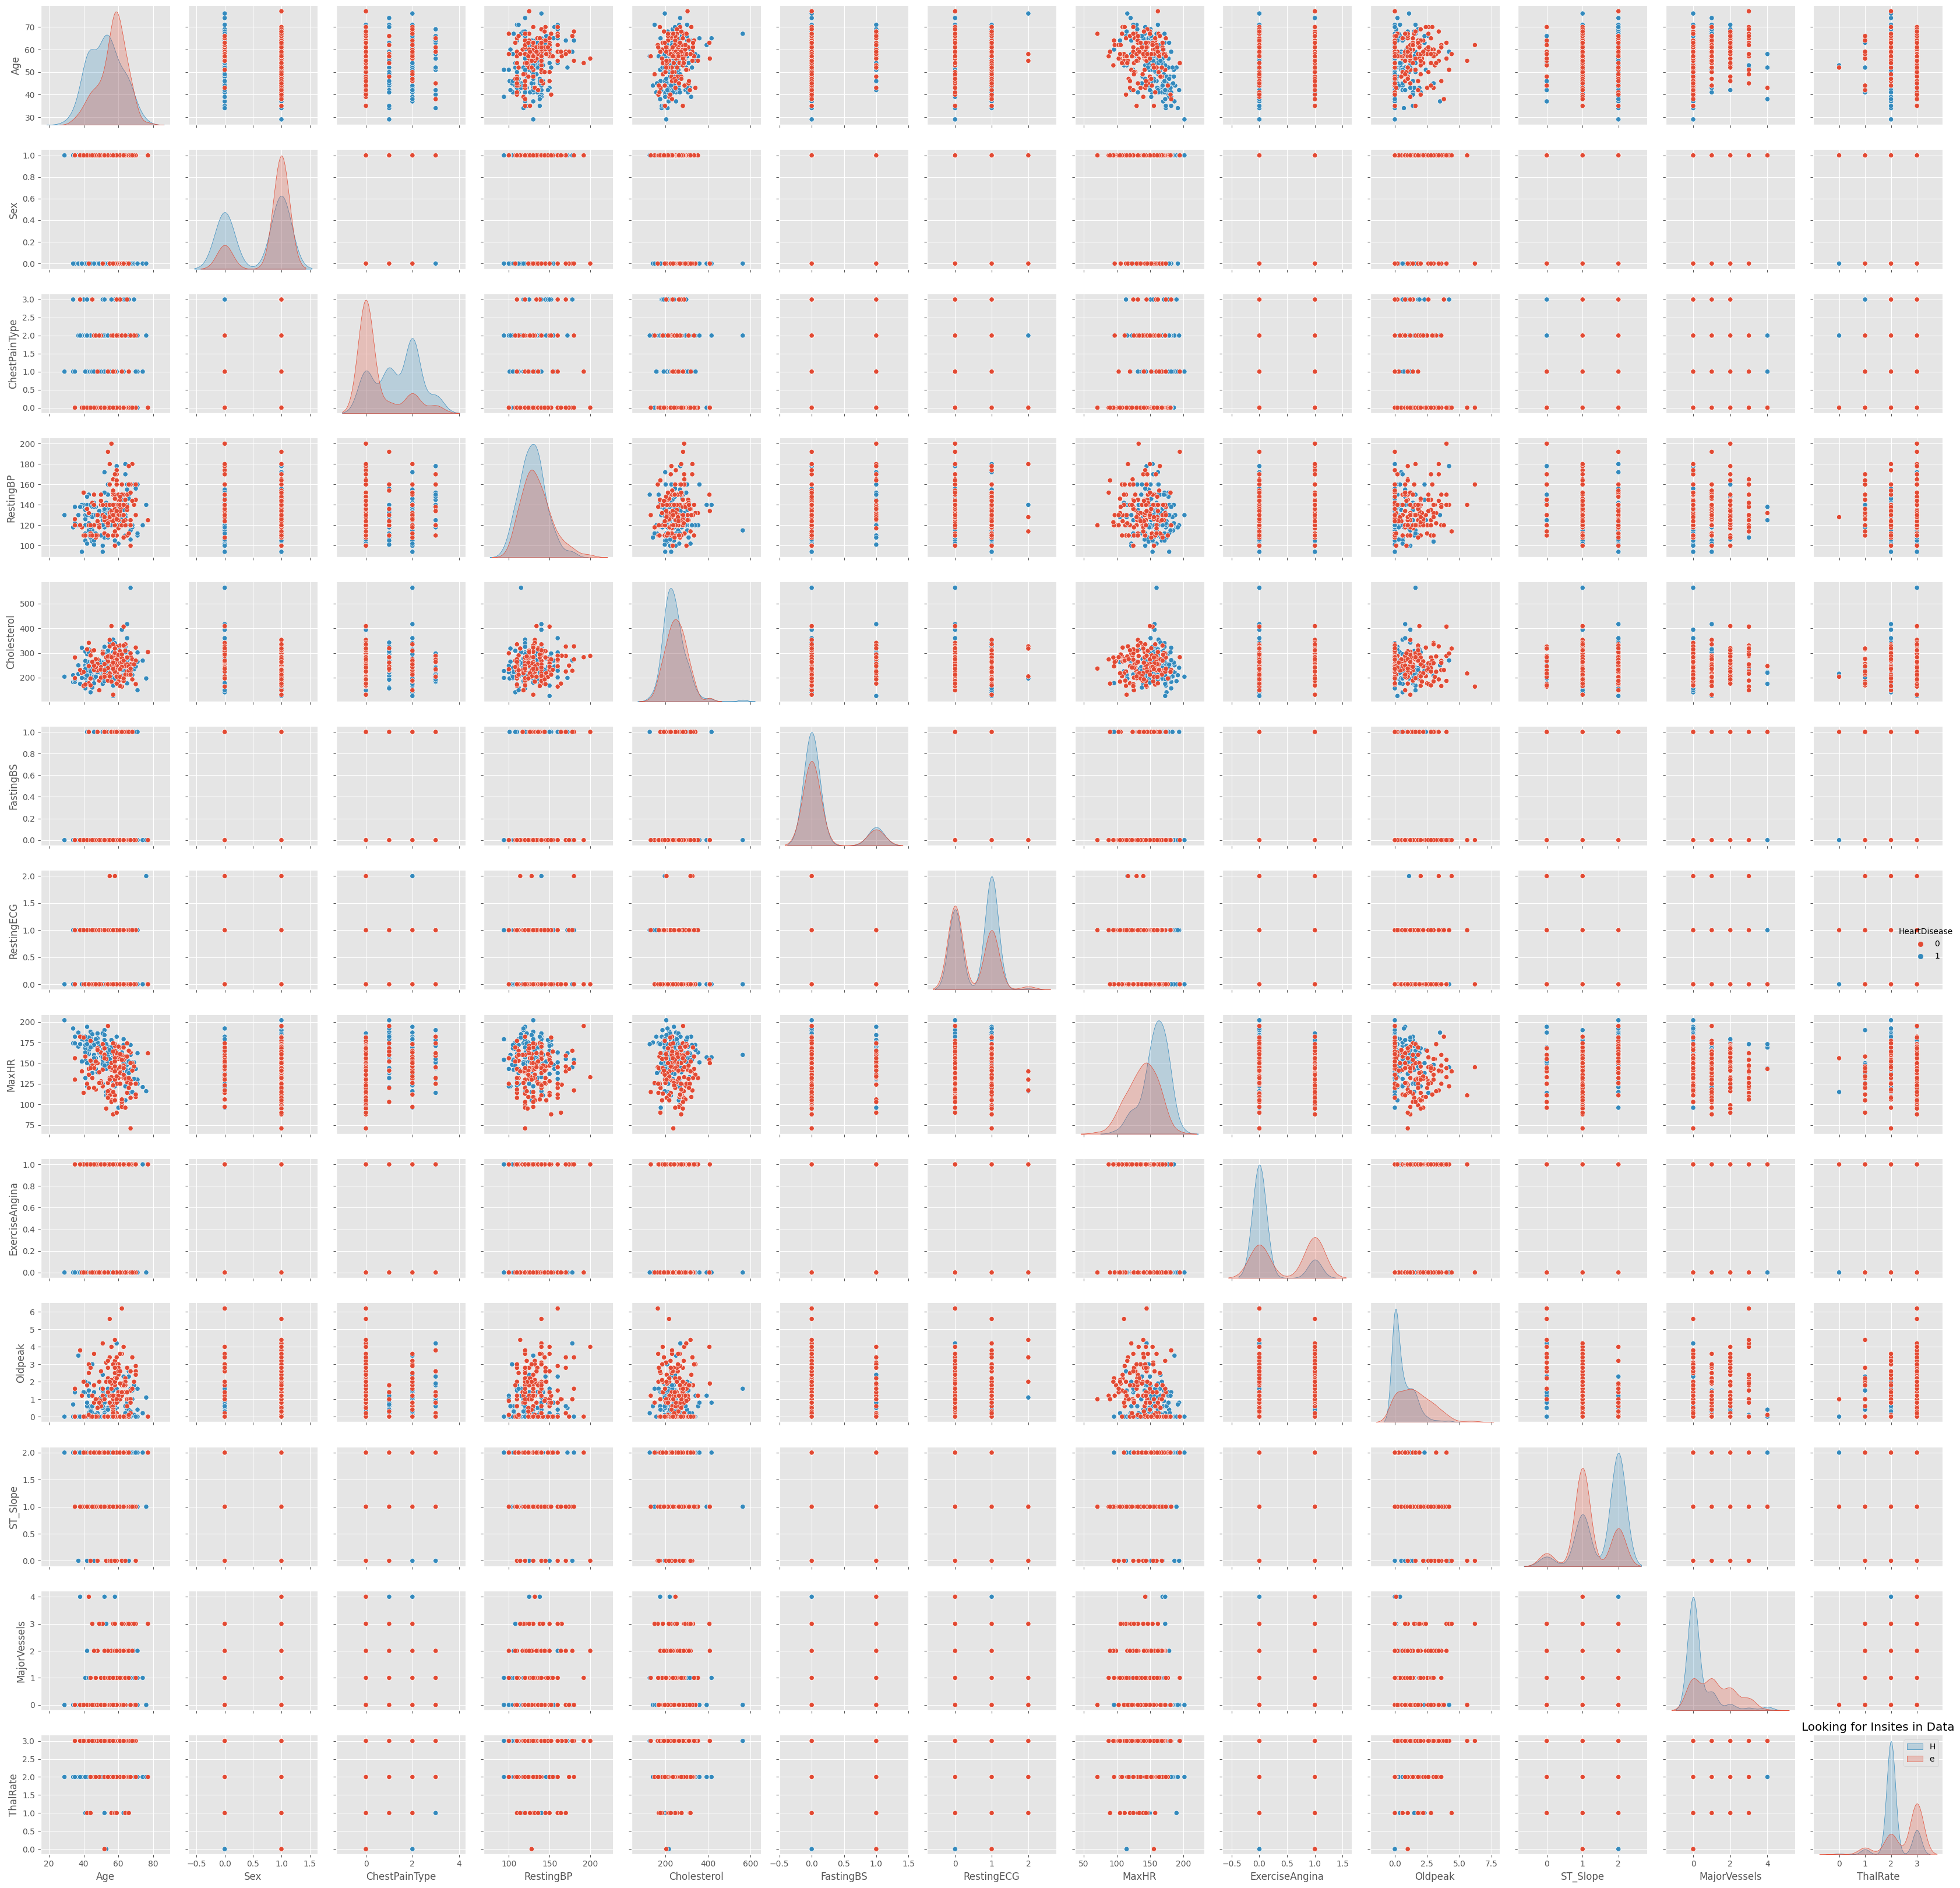

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

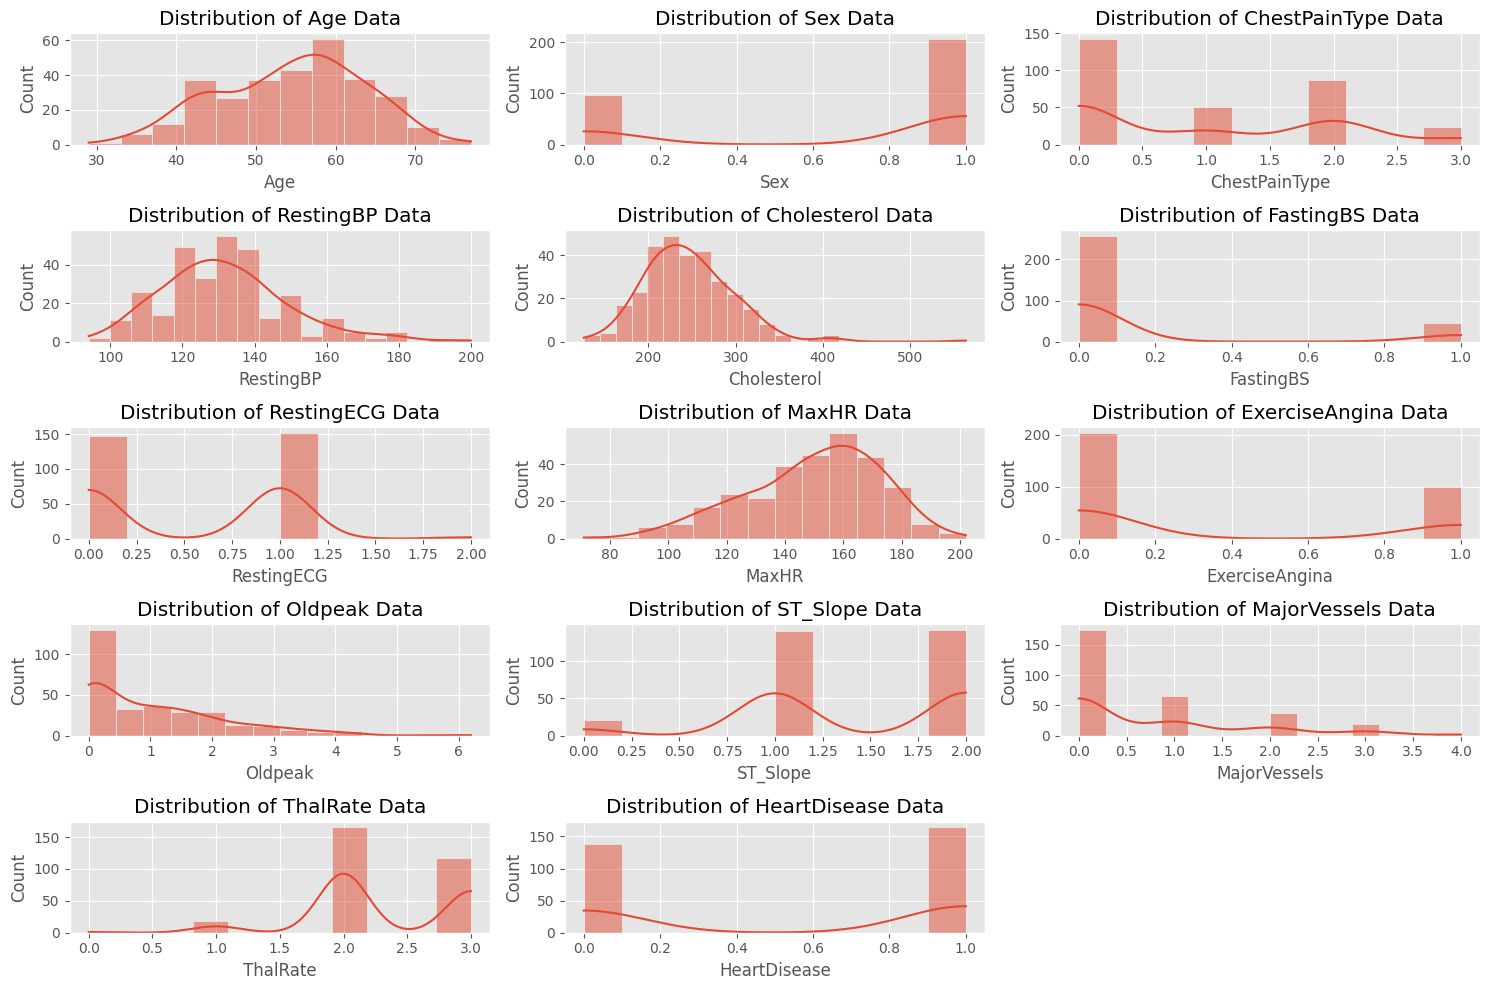

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(5,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

##Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    int64  
 2   ChestPainType   303 non-null    int64  
 3   RestingBP       303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   FastingBS       303 non-null    int64  
 6   RestingECG      303 non-null    int64  
 7   MaxHR           303 non-null    int64  
 8   ExerciseAngina  303 non-null    int64  
 9   Oldpeak         303 non-null    float64
 10  ST_Slope        303 non-null    int64  
 11  MajorVessels    303 non-null    int64  
 12  ThalRate        303 non-null    int64  
 13  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Checking for NULLs in the data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
MajorVessels      0
ThalRate          0
HeartDisease      0
dtype: int64

In [ ]:
import numpy as np
from scipy import stats

# Example using Z-score
z_scores = np.abs(stats.zscore(df))
threshold = 3
outliers = np.where(z_scores > threshold)
df = df[(z_scores < threshold).all(axis=1)]

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df2 = df.drop(['HeartDisease'],axis=1)
df2.columns
df[df2.columns] = scaler.fit_transform(df[df2.columns])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,MajorVessels,ThalRate,HeartDisease
0,0.571429,0.0,1.0,0.75,-0.126984,1.0,-1.0,-0.092308,0.0,0.9375,-1.0,0.0,-1.0,1
1,-1.285714,0.0,0.5,0.00,0.142857,0.0,0.0,1.046154,0.0,1.6875,-1.0,0.0,0.0,1
2,-1.000000,-1.0,0.0,0.00,-0.587302,0.0,-1.0,0.584615,0.0,0.3750,1.0,0.0,0.0,1
3,0.071429,0.0,0.0,-0.50,-0.079365,0.0,0.0,0.769231,0.0,0.0000,1.0,0.0,0.0,1
4,0.142857,-1.0,-0.5,-0.50,1.793651,0.0,0.0,0.307692,1.0,-0.1250,1.0,0.0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[df2.columns],df['HeartDisease'], test_size = 0.3, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (200, 13)
The shape of X_test is        (87, 13)
The shape of y_train is       (200,)
The shape of y_test is        (87,)


##Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve,f1_score,precision_score,recall_score,confusion_matrix

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)

y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred))
print("The test f1 score of Logistic Regression is ", f1_score(y_test, y_pred))
print("The test precision of Logistic Regression is ", precision_score(y_test, y_pred))
print("The test recall of Logistic Regression is ", recall_score(y_test, y_pred))
print("The confusion matrix of Logistic Regression is ", confusion_matrix(y_test, y_pred))

The test accuracy score of Logistic Regression is  0.8505747126436781
The test f1 score of Logistic Regression is  0.8785046728971964
The test precision of Logistic Regression is  0.8703703703703703
The test recall of Logistic Regression is  0.8867924528301887
The confusion matrix of Logistic Regression is  [[27  7]
 [ 6 47]]


In [ ]:
from sklearn.svm import SVC


# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred))
print("The test f1 score of Logistic Regression is ", f1_score(y_test, y_pred))
print("The test precision of Logistic Regression is ", precision_score(y_test, y_pred))
print("The test recall of Logistic Regression is ", recall_score(y_test, y_pred))
print("The confusion matrix of Logistic Regression is ", confusion_matrix(y_test, y_pred))

The test accuracy score of SVM is  0.8390804597701149
The test accuracy score of Logistic Regression is  0.8390804597701149
The test f1 score of Logistic Regression is  0.8703703703703703
The test precision of Logistic Regression is  0.8545454545454545
The test recall of Logistic Regression is  0.8867924528301887
The confusion matrix of Logistic Regression is  [[26  8]
 [ 6 47]]
